In [3]:
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd 

from pgmpy.utils import get_example_model
from pgmpy.inference import BeliefPropagation

c:\Users\Hasan\Desktop\PythonProj\genius-apps\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


A brief problem description

# **Inference**  

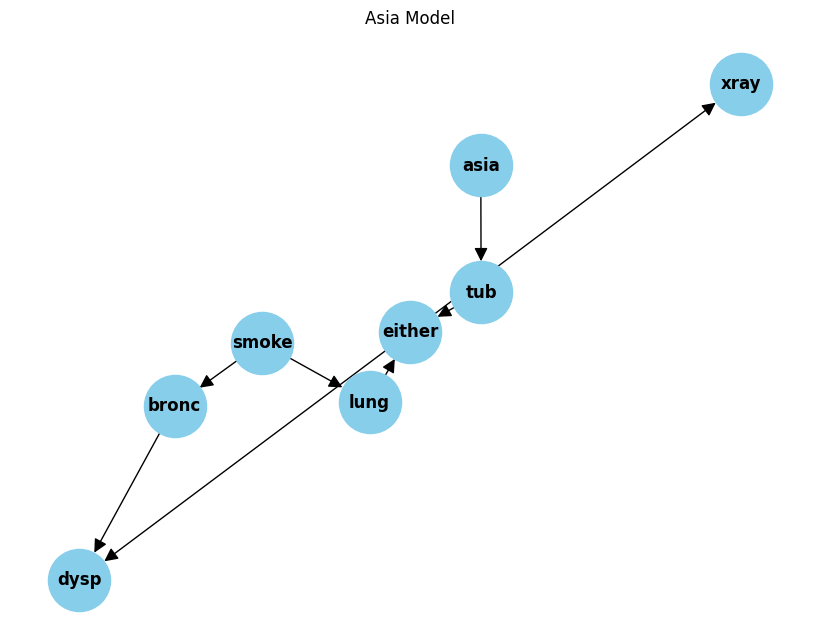

+---------+------------+-------------------+
| asia    | smoke      |   phi(asia,smoke) |
+=========+============+===================+
| asia(0) | smoke(yes) |            0.0091 |
+---------+------------+-------------------+
| asia(0) | smoke(no)  |            0.0009 |
+---------+------------+-------------------+
| asia(1) | smoke(yes) |            0.9000 |
+---------+------------+-------------------+
| asia(1) | smoke(no)  |            0.0900 |
+---------+------------+-------------------+


c:\Users\Hasan\Desktop\PythonProj\genius-apps\env\Lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:796: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi1.values


In [4]:
asia_model = get_example_model('asia')

edges = asia_model.edges()
nodes = asia_model.nodes()

G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Asia Model")
plt.show()

In [7]:
bp = BeliefPropagation(asia_model)
query_result = bp.query(variables=["asia", "smoke"], evidence={"lung": "yes"})
print(query_result)

+---------+------------+-------------------+
| asia    | smoke      |   phi(asia,smoke) |
+=========+============+===================+
| asia(0) | smoke(yes) |            0.0091 |
+---------+------------+-------------------+
| asia(0) | smoke(no)  |            0.0009 |
+---------+------------+-------------------+
| asia(1) | smoke(yes) |            0.9000 |
+---------+------------+-------------------+
| asia(1) | smoke(no)  |            0.0900 |
+---------+------------+-------------------+


c:\Users\Hasan\Desktop\PythonProj\genius-apps\env\Lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:796: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi1.values


# **Learning** 

In [8]:
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator

In [9]:
asia_model = get_example_model('asia')

edges = asia_model.edges()
nodes = asia_model.nodes()

values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, len(nodes))),
                      columns=nodes)

estimator = MaximumLikelihoodEstimator(asia_model, values)

print(estimator.get_parameters())

for cpd in estimator.get_parameters():
    print(cpd)

[<TabularCPD representing P(asia:2) at 0x1e1430e5450>, <TabularCPD representing P(tub:2 | asia:2) at 0x1e11f62fb10>, <TabularCPD representing P(smoke:2) at 0x1e11e83f610>, <TabularCPD representing P(lung:2 | smoke:2) at 0x1e11e8465d0>, <TabularCPD representing P(bronc:2 | smoke:2) at 0x1e11e847c50>, <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x1e11e847b50>, <TabularCPD representing P(xray:2 | either:2) at 0x1e11e8472d0>, <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x1e11e846110>]
+---------+-------+
| asia(0) | 0.488 |
+---------+-------+
| asia(1) | 0.512 |
+---------+-------+
+--------+---------------------+------------+
| asia   | asia(0)             | asia(1)    |
+--------+---------------------+------------+
| tub(0) | 0.47950819672131145 | 0.53515625 |
+--------+---------------------+------------+
| tub(1) | 0.5204918032786885  | 0.46484375 |
+--------+---------------------+------------+
+----------+-------+
| smoke(0) | 0.477 |
+----------+-------+
| s